In [14]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

In [15]:
low = "20210101.csv"
high = "20220101.csv"
building = "Martindale"
buildingsqft = 160767

In [16]:
files = os.listdir('.')
usage = {}

In [17]:
for file in files:
    if file>=low and file<=high:
        total = 0
        f = open(file, "r")
        for line in f:
            fields = line.split(",")
            if (building in fields[1]):
                total += float(fields[6])
        usage[file] = (total)
        f.close()


In [5]:
print(building)
print("Date \t\t kWh usage")
total = 0
for date in sorted(usage.keys()):
    fmt_usage = "{:.2f}".format(usage[date])
    #total += usage[date]
    #print(date[:8], "\t", fmt_usage)
    data1 = {'Date':[date[:8]], 'kWh Usage': [fmt_usage]}
    df5 = pd.DataFrame(data1)
    df5.to_csv('kwhperday.csv', mode='a', index=False, header=False)
#fmt_total = "{:.2f}".format(total)

#print(fmt_total)

Stewart
Date 		 kWh usage


In [18]:
print(building)
print("Date \t\t kWh usage")
total = 0
for date in sorted(usage.keys()):
    fmt_usage = "{:.2f}".format(usage[date])
    data2 = {'Date':[date[:8]], 'kWhUsage': [fmt_usage]}
    df6 = pd.DataFrame(data2)
    df6.to_csv('kwhuseMart.csv', mode='a', index=False, header=False)


Martindale
Date 		 kWh usage


In [25]:
mart = pd.read_csv('kwhuseMart.csv')
mart = mart[mart.kWhUsage != 0]
mart

,Date,kWhUsage
0,20210101,721.92
1,20210102,708.96
2,20210103,715.92
3,20210104,723.60
4,20210105,981.60
...,...,...
361,20211228,695.04
362,20211229,444.00
363,20211230,694.80
364,20211231,680.40


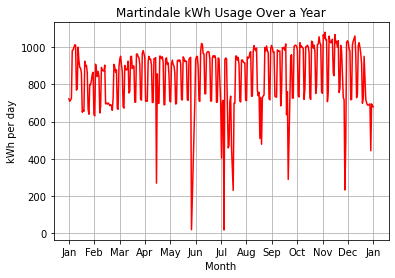

In [21]:
plt.plot(mart.index, mart['kWhUsage'], color='red')
plt.grid('True')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','Jan']
plt.xticks(np.linspace(0,365,13), months)
plt.ylabel('kWh per day')
plt.xlabel('Month')
plt.title('Martindale kWh Usage Over a Year')
plt.show()

In [6]:
stew = pd.read_csv('kwhperday.csv')
stew = stew[stew.kWhUsage != 0]
stew

,Date,kWhUsage
0,20210101,1522.56
1,20210102,1419.36
2,20210103,1553.28
3,20210104,1533.60
4,20210105,1482.72
...,...,...
361,20211228,1705.20
362,20211229,1122.72
363,20211230,1625.52
364,20211231,1494.24


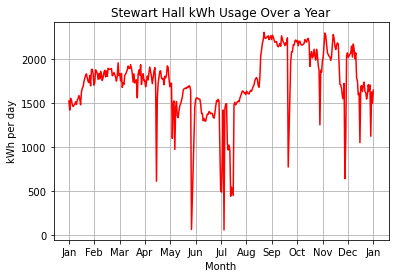

In [13]:
plt.plot(stew.index, stew['kWhUsage'], color='red')
plt.grid('True')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','Jan']
plt.xticks(np.linspace(0,365,13), months)
plt.ylabel('kWh per day')
plt.xlabel('Month')
plt.title('Stewart Hall kWh Usage Over a Year')
plt.show()

In [107]:
df = pd.read_csv('totalwhsqs.csv')
df

,Building,Total Wh/Sqft
0,Weir (2002),14390.89
1,Minor (2012),11586.84
2,JC West (2014),31226.57
3,CME (2012),31993.39
4,Library (1996),33920.00
5,Fedex (2007),33759.33
6,Union (2015),18298.55


<function matplotlib.pyplot.show(close=None, block=None)>

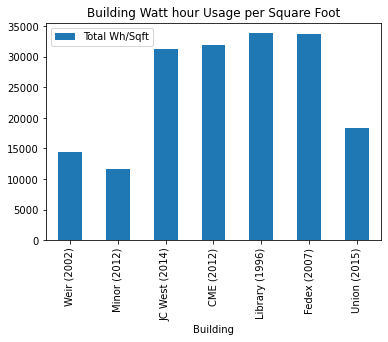

In [114]:
df.plot(x='Building', y='Total Wh/Sqft', kind='bar')
plt.title('Building Watt hour Usage per Square Foot')
plt.show